# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [199]:
cities_pd = pd.DataFrame()
cities_pd['City'] = cities
cities_pd['Lat'] = ""
cities_pd['Lng'] = ""
cities_pd['Max Temp'] = ""
cities_pd['Humidity'] = ""
cities_pd['Cloudiness'] = ""
cities_pd['Wind Speed'] = ""
cities_pd['Country'] = ""
cities_pd['Date'] = ""
cities_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,,,,,,,,
1,punta arenas,,,,,,,,
2,zhaoyuan,,,,,,,,
3,new norfolk,,,,,,,,
4,bengkulu,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# set up lists to hold reponse info

city = [] 
lat = []
lng = []
max_temp = []
humidity = []
cloudiness= []
wind_speed = []
country = []
date = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key =  weather_api_key

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    try:
    
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])

        print(f'City ' + city + ' completed' )
        
        #sys.stdout=open("/Logs/successfull cities.txt","w")
        #print(f'City ' + city + ' completed' )
        #sys.stdout.close()
        
    except(KeyError, IndexError):
        
        print("City not found. Skipping...")
        #sys.stdout=open("/Logs/failed cities.txt","w")
        #print("City not found. Skipping...")
        #sys.stdout.close()

City buraydah completed
City rabo de peixe completed
City carnarvon completed
City not found. Skipping...
City thompson completed
City albany completed
City yarmouth completed
City bambanglipuro completed
City opuwo completed
City seoul completed
City axim completed
City yellowknife completed
City butaritari completed
City tucuman completed
City not found. Skipping...
City tuatapere completed
City busselton completed
City not found. Skipping...
City adrar completed
City deputatskiy completed
City longyearbyen completed
City sakakah completed
City andros town completed
City sorland completed
City ponta do sol completed
City atuona completed
City puerto ayora completed
City miri completed
City ushuaia completed
City okhotsk completed
City tuktoyaktuk completed
City qaanaaq completed
City kedrovyy completed
City east london completed
City mongomo completed
City jamestown completed
City not found. Skipping...
City cape town completed
City mecca completed
City sabha completed
City tautira c

City not found. Skipping...
City sur completed
City port blair completed
City russell completed
City bintulu completed
City port hardy completed
City sabla completed
City san javier completed
City not found. Skipping...
City pauini completed
City rocha completed
City santa maria completed
City kalevala completed
City barbastro completed
City camana completed
City vakhrushev completed
City olafsvik completed
City jabinyanah completed
City grand-santi completed
City padang completed
City redmond completed
City tranas completed
City gayeri completed
City magadan completed
City varnamo completed
City richards bay completed
City eureka completed
City gillette completed
City nadym completed
City not found. Skipping...
City koungou completed
City havelock completed
City ust-kuyga completed
City not found. Skipping...
City ambon completed
City antofagasta completed
City buala completed
City not found. Skipping...
City ribeira grande completed
City tabas completed
City grenfell completed
City t

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
# Visualize to confirm airport data appears
cities_dict = ({"City":cities,
    "Lat": lat, 
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity" : humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country, 
    "Date": date
    })

cities_dict_df = pd.DataFrame.from_dict(cities_dict, orient='index').transpose()
cities_dict_df.head()

# Save Data to csv
cities_dict_df.to_csv("WeatherPy.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
cities_dict_df["Humidity"].max()

100

In [15]:
#  Get the indices of cities that have humidity over 100%.

hum_cities = cities_dict_df.loc[cities_dict_df['Humidity'] >= 100,:]
hum_cities.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,albany,41.7057,-70.2286,14.44,100,90,5.14,US,1619761980
32,kedrovyy,42.097,-79.2353,7.22,100,90,5.66,US,1619761992
49,takoradi,71.9667,102.5,0.66,100,100,1.53,RU,1619762000
69,port elizabeth,53.1969,-8.5669,3,100,75,1.03,IE,1619762009
73,taltal,44.5875,-1.0519,7.22,100,75,0.41,FR,1619762011


In [243]:
print("No City over 100% Humidity")

No City over 100% Humidity


In [53]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_dict_df.loc[cities_dict_df["Humidity"] <= 100]
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,buraydah,26.326,43.975,25,31,0,2.57,SA,1619761978
1,rabo de peixe,37.8,-25.5833,13,88,75,2.06,PT,1619761978
2,carnarvon,-24.8667,113.633,25,69,40,9.77,AU,1619761979
3,taolanaro,55.7435,-97.8558,-6,73,40,3.13,CA,1619761980
4,thompson,42.6001,-73.9662,13.33,84,100,0.89,US,1619761923


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

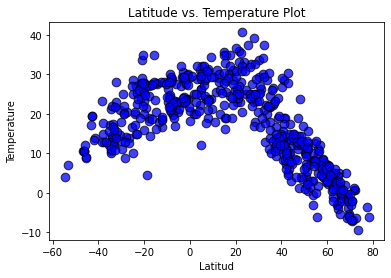

In [17]:
marker_size=15
plt.scatter(clean_city_data['Lat'],clean_city_data['Max Temp'],s=75, color="blue",alpha=0.75, edgecolors = "black")
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitud")
plt.ylabel("Temperature")


plt.savefig("Images/Latitude vs. Temperature Plot.png", bbox_inches = "tight")
plt.show()

Notes:

The closer to 0 (ecuator) the higher the temperature.
The far away from 0 (ecuator) the lower the temperature.

## Latitude vs. Humidity Plot

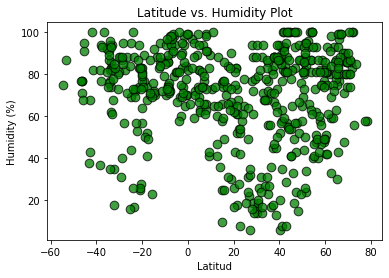

In [18]:
marker_size=15
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'],s=75, color="green",alpha=0.75, edgecolors = "black")
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitud")
plt.ylabel("Humidity (%)")


plt.savefig("Images/Latitude vs. Humidity Plot.png", bbox_inches = "tight")
plt.show()

Notes:

There is no clear relationship but there seems to be more concentration of higher humidity closer to 0. 
Also, we can see more points as the latitud goes higher.

## Latitude vs. Cloudiness Plot

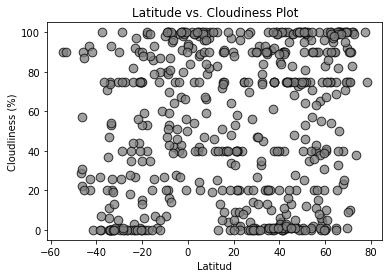

In [19]:
marker_size=15
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'],s=75, color="grey", alpha=0.75, edgecolors = "black")
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitud")
plt.ylabel("Cloudliness (%)")


plt.savefig("Images/Latitude vs. Cloudliness.png", bbox_inches = "tight")
plt.show()

Notes:

There is no clear relationship. Also, we can see more points as the latitud goes higher.

## Latitude vs. Wind Speed Plot

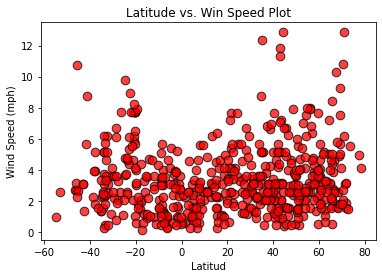

In [20]:
marker_size=15
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'],s=75, color="red", alpha=0.75, edgecolors = "black")
plt.title("Latitude vs. Win Speed Plot")
plt.xlabel("Latitud")
plt.ylabel("Wind Speed (mph)")


plt.savefig("Images/Latitude vs. Wind Speed Plot.png", bbox_inches = "tight")
plt.show()

Notes:

There is no clear relationship. We can see more points as the wind speed goes lower.

## Linear Regression

In [54]:
clean_city_data["Lat"] = cities_dict_df["Lat"].astype(float)
clean_city_data["Lng"] = cities_dict_df["Lng"].astype(float)
clean_city_data["Max Temp"] = cities_dict_df["Max Temp"].astype(float)
clean_city_data["Humidity"] = cities_dict_df["Humidity"].astype(float)
clean_city_data["Cloudiness"] = cities_dict_df["Cloudiness"].astype(float)
clean_city_data["Wind Speed"] = cities_dict_df["Wind Speed"].astype(float)

clean_city_data.dtypes

<ipython-input-54-75249bf0cfff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_city_data["Lat"] = cities_dict_df["Lat"].astype(float)
<ipython-input-54-75249bf0cfff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_city_data["Lng"] = cities_dict_df["Lng"].astype(float)
<ipython-input-54-75249bf0cfff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date           object
dtype: object

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [60]:
northern_df = clean_city_data.loc[clean_city_data['Lat'] > 0,:]
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,buraydah,26.3260,43.9750,25.00,31.0,0.0,2.57,SA,1619761978
1,rabo de peixe,37.8000,-25.5833,13.00,88.0,75.0,2.06,PT,1619761978
3,taolanaro,55.7435,-97.8558,-6.00,73.0,40.0,3.13,CA,1619761980
4,thompson,42.6001,-73.9662,13.33,84.0,100.0,0.89,US,1619761923
5,albany,41.7057,-70.2286,14.44,100.0,90.0,5.14,US,1619761980


In [57]:
northern_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date           object
dtype: object

The correlation between Latitude and Max Temp is -0.86
The r-squared is: 0.7359968216748514


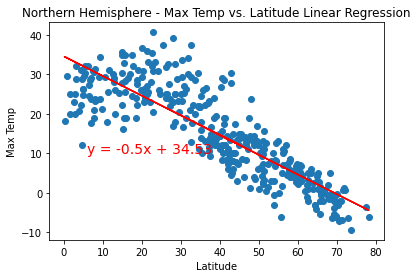

In [58]:
correlation=round(st.pearsonr(northern_df["Lat"], northern_df["Max Temp"])[0],2)
print(f"The correlation between Latitude and Max Temp is {correlation}")

x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png", bbox_inches = "tight")
plt.show()

Notes:

The closer to 0 (equator) the higher the temperature. The far away from 0 (ecuator) the lower the temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [61]:
southern_df = clean_city_data.loc[clean_city_data['Lat'] < 0,:]
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,carnarvon,-24.8667,113.6333,25.00,69.0,40.0,9.77,AU,1619761979
6,yarmouth,-7.9500,110.2833,28.82,72.0,87.0,3.96,ID,1619761981
7,bambanglipuro,-18.0607,13.8400,19.00,52.0,53.0,1.49,NA,1619761981
12,butaritari,-26.8241,-65.2226,14.00,88.0,0.0,2.57,AR,1619761983
13,tucuman,-46.1333,167.6833,10.56,77.0,57.0,2.68,NZ,1619761984


In [62]:
southern_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date           object
dtype: object

The correlation between Latitude and Max Temp is 0.66
The r-squared is: 0.44084349933073097


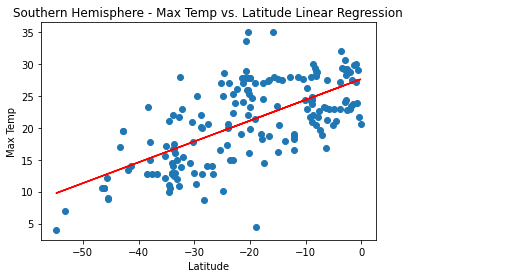

In [63]:
correlation=round(st.pearsonr(southern_df["Lat"], southern_df["Max Temp"])[0],2)
print(f"The correlation between Latitude and Max Temp is {correlation}")

x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png", bbox_inches = "tight")
plt.show()

Notes: 

The closer to 0 (equator) the higher the temperature. The far away from 0 (ecuator) the lower the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Latitude and Humidity(%) is 0.16
The r-squared is: 0.025303741685679445


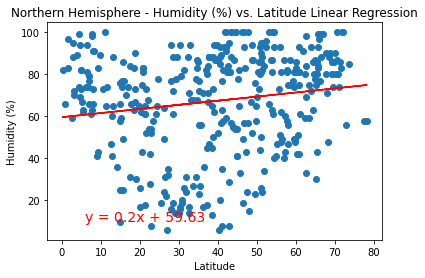

In [65]:
correlation=round(st.pearsonr(northern_df["Lat"], northern_df["Humidity"])[0],2)
print(f"The correlation between Latitude and Humidity(%) is {correlation}")

x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png", bbox_inches = "tight")
plt.show()

Notes:
    
Not a strong relationship. Humidity decrease as latitud approach to 0 (equator)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Latitude and Humidity(%) is 0.13
The r-squared is: 0.018183119758654415


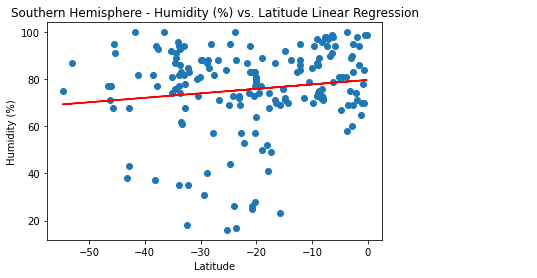

In [66]:
correlation=round(st.pearsonr(southern_df["Lat"], southern_df["Humidity"])[0],2)
print(f"The correlation between Latitude and Humidity(%) is {correlation}")

x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png", bbox_inches = "tight")
plt.show()

Notes:
    
A small humidity increase as latitud approach to 0 (equator)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Latitude and Cloudiness(%) is 0.05
The r-squared is: 0.0023207691798011985


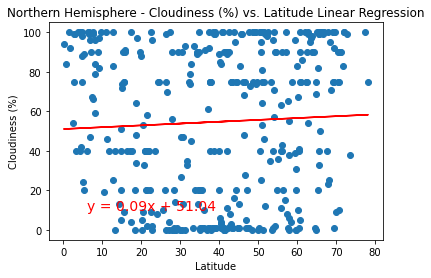

In [67]:
correlation=round(st.pearsonr(northern_df["Lat"], northern_df["Cloudiness"])[0],2)
print(f"The correlation between Latitude and Cloudiness(%) is {correlation}")

x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png", bbox_inches = "tight")
plt.show()

Notes:
    
There is no clear relationship.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Latitude and Cloudiness(%) is 0.32
The r-squared is: 0.09965483420965578


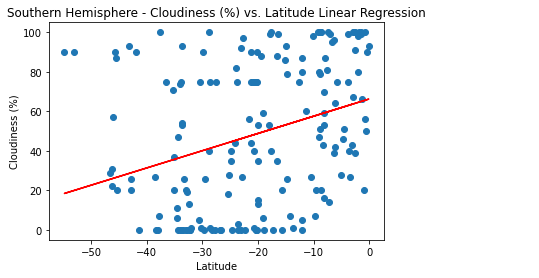

In [70]:
correlation=round(st.pearsonr(southern_df["Lat"], southern_df["Cloudiness"])[0],2)
print(f"The correlation between Latitude and Cloudiness(%) is {correlation}")

x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png", bbox_inches = "tight")
plt.show()

Notes:
    
There is no clear relationship.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Latitude and Wind Speed(mph) is 0.19
The r-squared is: 0.03767915729145586


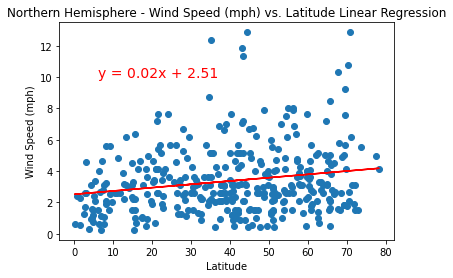

In [72]:
correlation=round(st.pearsonr(northern_df["Lat"], northern_df["Wind Speed"])[0],2)
print(f"The correlation between Latitude and Wind Speed(mph) is {correlation}")

x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png", bbox_inches = "tight")
plt.show()

Notes: 

There is no clear relationship. We can see more points as the wind speed goes lower.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Latitude and Wind Speed(mph) is -0.19
The r-squared is: 0.035816195526522585


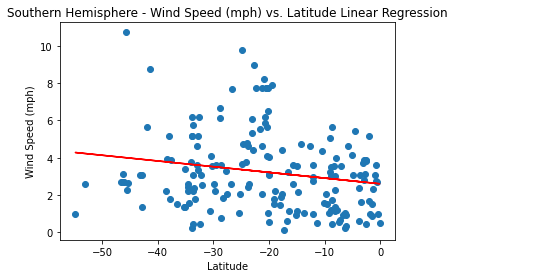

In [73]:
correlation=round(st.pearsonr(southern_df["Lat"], southern_df["Wind Speed"])[0],2)
print(f"The correlation between Latitude and Wind Speed(mph) is {correlation}")

x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png", bbox_inches = "tight")
plt.show()

Notes: 

There is no clear relationship. We can see more points as the wind speed goes lower.

# Final Analisys
----

#### Notes:
1. Dataframe created with relevant information for cities generated randomly such as Latitude, Longitude, Max Temperature, Humidity, Cloudiness, Wind Speed, Country, Date.


2. API calls to openweathermap.org to fullfill the lists created for items mentioned before.


3. New DataFrame equal to the city data to drop all humidity higher than 100 was created.


4. Latitude vs. Temperature Plot.

   The closer to 0 (equator) the higher the temperature.
   
   The far away from 0 (equator) the lower the temperature.


5. Latitude vs. Temperature Plot.

   There is no clear relationship but there seems to be more concentration of higher humidity closer to 0. 
   
   Also, we can see more points as the latitud goes higher.
   
   
6. Latitud vs. Wind Speed Plot

    There is no clear relationship. We can see more points as the wind speed goes lower.
    
    
7. Northern Hemisphere - Max Temp vs. Latitude Linear Regression

    The closer to 0 (equator) the higher the temperature. The far away from 0 (ecuator) the lower the temperature.
    
    
8. Southern Hemisphere - Max Temp vs. Latitude Linear Regression

    The closer to 0 (equator) the higher the temperature. The far away from 0 (ecuator) the lower the temperature.


9. Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
    
    A small humidity decrease as latitud approach to 0 (equator).
    

10. Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

    A small humidity increase as latitud approach to 0 (equator).
    
    
11. Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

    There is no clear relationship.
    
    
12. Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

    There is no clear relationship.
    
    
13. Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

    There is no clear relationship. We can see more points as the wind speed goes lower.   
    
    
14. Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

    There is no clear relationship. We can see more points as the wind speed goes lower.   